In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Time Series (Hotel Booking)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# Text Analytics (Political Social Media Posts)

# Regular Expressions - lets us precicely manipulate strings
import re

# Let's use create a Word Cloud visualisation
from wordcloud import WordCloud

# An NLP library
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Natural language toolkit - another NLP library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Print results nicely
from pprint import pprint

# Visulalisation library for our LDA analysis
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()

# If you want to save the visualisation data
import pickle 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Time Series
# Real-world dataset: Hotel Booking

In [2]:
df_hotel = pd.read_csv('hotel_booking.csv')

In [3]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,9/7/2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
df_hotel.dtypes.value_counts()

object     16
int64      16
float64     4
dtype: int64

In [6]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df_hotel.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [8]:
# We will convert dtype 'object' to 'datetime'

df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'])

In [9]:
df_hotel['reservation_status_date'].dtype

dtype('<M8[ns]')

In [10]:
df_hotel['reservation_status_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]

In [11]:
# Set Index
df_hotel.set_index('reservation_status_date', inplace=True)

In [12]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2015-07-02,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
2015-07-02,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
2015-07-03,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [13]:
# Exploring the dates
df_hotel.index

DatetimeIndex(['2015-07-01', '2015-07-01', '2015-07-02', '2015-07-02',
               '2015-07-03', '2015-07-03', '2015-07-03', '2015-07-03',
               '2015-05-06', '2015-04-22',
               ...
               '2017-09-04', '2017-09-05', '2017-09-05', '2017-09-06',
               '2017-09-06', '2017-09-06', '2017-09-07', '2017-09-07',
               '2017-09-07', '2017-09-07'],
              dtype='datetime64[ns]', name='reservation_status_date', length=119390, freq=None)

In [14]:
# ValueError: cannot reindex on an axis with duplicate labels
# We will remove duplicate dates

df_hotel = df_hotel[~df_hotel.index.duplicated(keep='first')]
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2015-07-02,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
2015-07-03,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498
2015-05-06,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.00,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
2015-04-22,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.50,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [15]:
# Modify the index to daily frequency

df_hotel = df_hotel.asfreq("D") # Change the frecuency to daily
df_hotel.index

DatetimeIndex(['2014-10-17', '2014-10-18', '2014-10-19', '2014-10-20',
               '2014-10-21', '2014-10-22', '2014-10-23', '2014-10-24',
               '2014-10-25', '2014-10-26',
               ...
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14'],
              dtype='datetime64[ns]', name='reservation_status_date', length=1064, freq='D')

In [16]:
# Resample the DataFrame to Weekly frequency

df_weekly = df_hotel.resample('W').sum()
df_weekly.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
reservation_status_date,,,,,,,,,,,,,,,,,,,,
2014-10-19,1.00,265.00,2015.00,28.00,9.00,0.00,2.00,2.00,0.00,0.00,1.00,21.00,0.00,0.00,1.00,0.00,0.00,62.80,0.00,0.00
2014-10-26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Performing adFuller to check for stationarity

In [17]:
# MissingDataError: exog contains inf or nans

# adfuller(df_hotel['adr'])

In [18]:
# Checking for NaN values

df_hotel['adr'].isna().value_counts()

False    926
True     138
Name: adr, dtype: int64

In [19]:
# Checking for Inf values

np.isinf(df_hotel['adr']).value_counts()

False    1064
Name: adr, dtype: int64

In [20]:
df_hotel['adr'].sort_values(ascending=False)

reservation_status_date
2016-07-27   369.00
2016-12-30   340.00
2017-06-25   315.00
2017-07-23   292.00
2017-08-12   290.00
              ...  
2015-06-07      NaN
2015-06-21      NaN
2015-06-28      NaN
2017-09-11      NaN
2017-09-13      NaN
Name: adr, Length: 1064, dtype: float64

In [21]:
# Dropping NaN from column 'adr'

df_hotel.dropna(subset=['adr'], inplace=True)

In [22]:
print('NaN values in ADR:', df_hotel['adr'].isna().sum())

NaN values in ADR: 0


In [23]:
df_hotel['adr'].describe()

count   926.00
mean     92.76
std      57.16
min       0.00
25%      50.01
50%      78.00
75%     123.75
max     369.00
Name: adr, dtype: float64

## Weekly ADR Plot

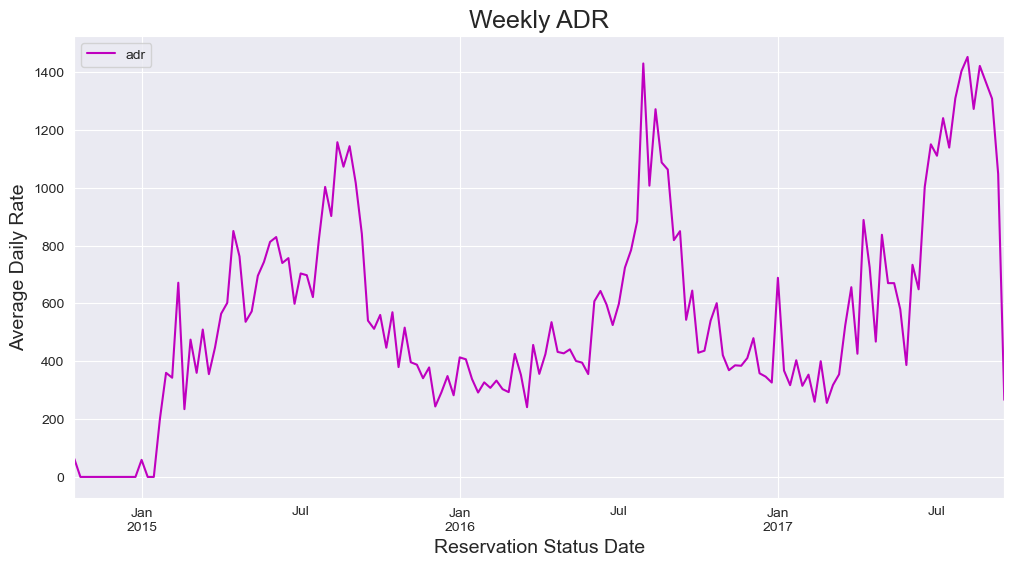

In [24]:
df_weekly[['adr']].plot(figsize=(12, 6), color='m')

plt.title('Weekly ADR',fontsize=18)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xlabel('Reservation Status Date', fontsize=14);

Augmented Dickey Fuller test (ADF Test) is identified as the common statistical test employed to test whether a given Time Series is stationary or not.

If our Time Series is Stationary then we can apply ARMA model otherwise we have to apply a more complex model (ARIMA)

if p-value is small then reject null hypothesis non-stationary ----> 0.05

We need to make this plot stationary

In [25]:
adfuller(df_hotel['adr'])

(-2.391424161384229,
 0.14417151984254284,
 12,
 913,
 {'1%': -3.4375326734225844,
  '5%': -2.8647108493902986,
  '10%': -2.568458364370556},
 9220.227185797383)

**it is not stationary ---> p-value > 0.05 (0.14417151984254284)**

### Autocorrelation

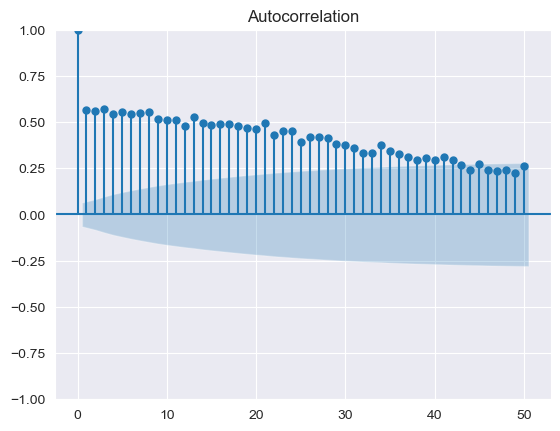

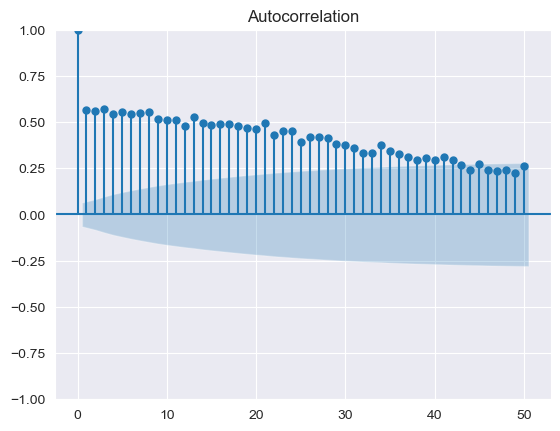

In [28]:
plot_acf(df_hotel['adr'],lags=50)

Notice that the autocorrelations do not die out and they show a decrease pattern

### Partial Autocorrelation

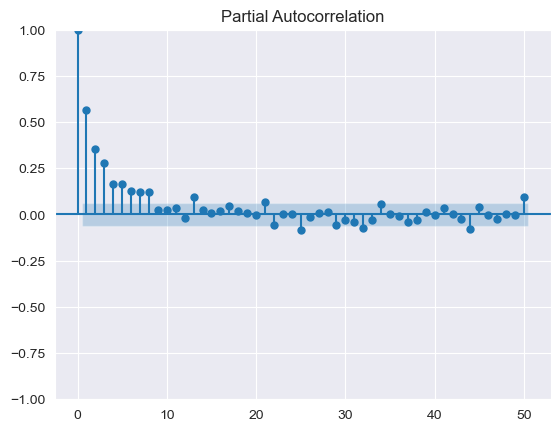

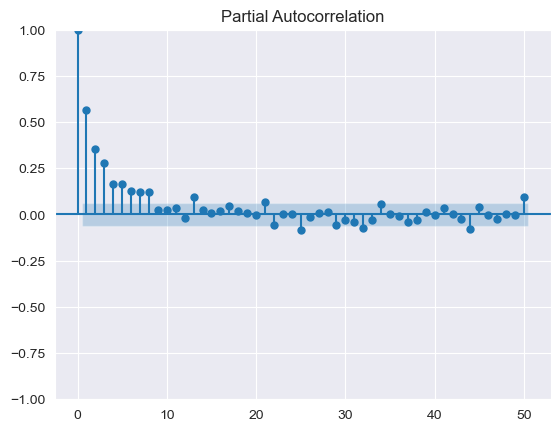

In [29]:
plot_pacf(df_hotel['adr'], method='ywm',lags=50)

ACF - Exponential decay => no MA (q=0)

PACF - Significant value at lag 1 ie p=1

### Split data 80% for train set and 20% for test set

In [30]:
df_hotel.shape

(926, 35)

In [31]:
# Split training set 80% & Test Set 20%
split = int(df_hotel.shape[0] * 0.8)
split

740

In [32]:
df_train = df_hotel[:split] # rows from index 0 up to, but not including, the index specified by the variable split
df_test = df_hotel[split:] # It starts from the index specified by split and goes up to, and including, the end of the DF

In [33]:
print('Train Set:',df_train.shape)
print('Test Set:',df_test.shape)

Train Set: (740, 35)
Test Set: (186, 35)


In [34]:
df_train.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2017-03-06,Resort Hotel,1.00,4.00,2017.00,March,10.00,6.00,1.00,0.00,1.00,...,0.00,Transient,30.00,0.00,0.00,No-Show,Timothy Bray,Timothy.B@hotmail.com,828-385-3287,************3519
2017-03-07,Resort Hotel,1.00,88.00,2017.00,March,10.00,11.00,2.00,5.00,2.00,...,0.00,Transient-Party,34.00,0.00,0.00,Canceled,David Turner,DTurner@att.com,842-680-3576,************3180
2017-03-08,Resort Hotel,1.00,2.00,2017.00,March,10.00,8.00,0.00,1.00,1.00,...,0.00,Transient,35.00,0.00,0.00,Canceled,Amber Vargas,AVargas83@zoho.com,353-277-3623,************9039
2017-03-09,Resort Hotel,1.00,211.00,2017.00,March,10.00,9.00,0.00,1.00,1.00,...,0.00,Transient,33.30,0.00,0.00,No-Show,Ross Pruitt,Pruitt_Ross53@gmail.com,176-954-6960,************6910
2017-03-10,Resort Hotel,1.00,16.00,2017.00,March,10.00,10.00,0.00,2.00,2.00,...,0.00,Transient,80.00,0.00,0.00,No-Show,Renee Lee,Lee.Renee67@outlook.com,418-276-2908,************1115


In [35]:
adfuller(df_train['adr'])

(-2.3694625392647364,
 0.15054149513940485,
 12,
 727,
 {'1%': -3.439376877165393,
  '5%': -2.865523768488869,
  '10%': -2.5688914082860164},
 7179.131344864171)

**After training and testing the dataset, it remains non-stationary, as the p-value > 0.05 (0.15054149513940485). Therefore, we will perform ARIMA**

# ARIMA

Since the time series is not stationary, it needs to be stationarised through differencing

In [36]:
adfuller(df_train['adr'].diff(1).dropna()) # First row has NaN values, so we have to drop it.

(-11.829723377764175,
 8.044706107668088e-22,
 11,
 727,
 {'1%': -3.439376877165393,
  '5%': -2.865523768488869,
  '10%': -2.5688914082860164},
 7172.253351688272)

**We needed diff(1) to get a p-value less than the significance level of 0.05 (8.044706107668088e-22), suggesting the time series is stationary**

The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

## Time series plot of the data

## Differenced Average Daily Rate over Reservation Dates

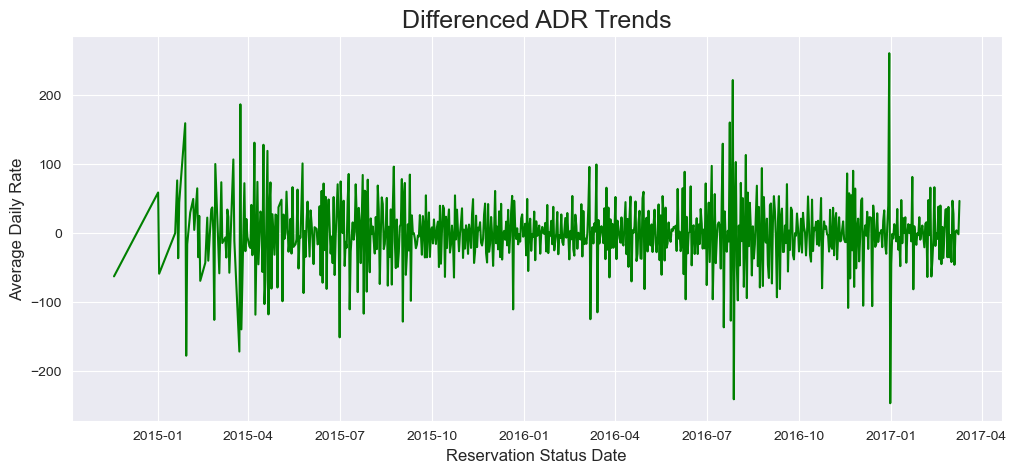

In [37]:
plt.figure(figsize= [12, 5])

plt.plot(df_train['adr'].diff(1).dropna(), color='g')

plt.title('Differenced ADR Trends',fontsize=18)
plt.ylabel('Average Daily Rate',fontsize=12)
plt.xlabel('Reservation Status Date',fontsize=12);

### Autocorrelation

In [38]:
df_hotel['Diff'] = df_train['adr'].diff(1)

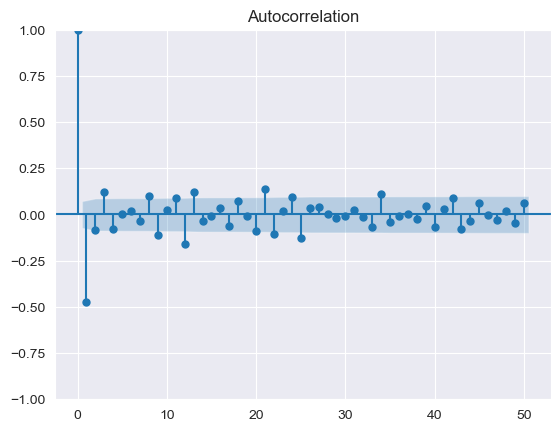

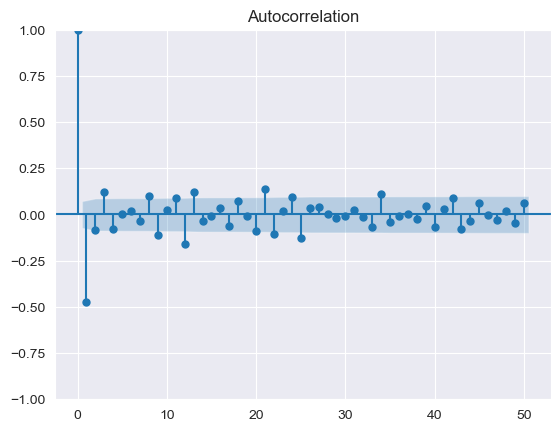

In [39]:
plot_acf(df_hotel['Diff'].dropna(),lags=50)

**The autocorrelations seem to be die down fairly after lag 0, then remain constantly lower**

There seems to be some repetition 1 up, 2 down or 1 up 1 down

There seems to be some seasonality every 3 months and there are small spikes in repetition

There seems to be a correlation in the time of the year

### Partial Autocorrelation

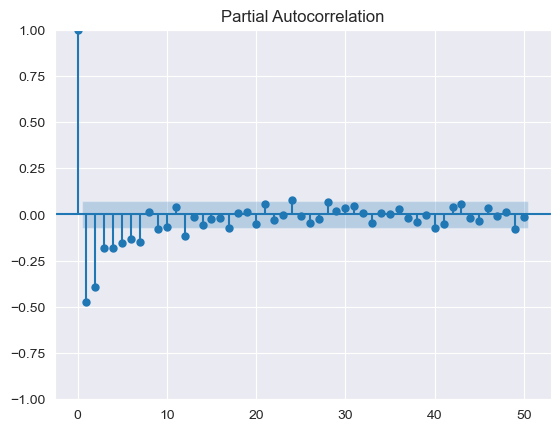

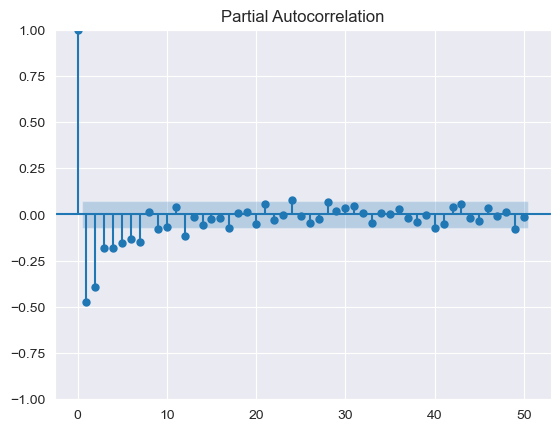

In [38]:
plot_pacf(df_hotel['Diff'].dropna(), method="ywm", lags=50)

**The partial autocorrelations seem to be small after the first one lag, so we decide to fit an ARIMA between 0 and 1**

Here, there seems to be fluctionations in seasonality every 8 months, 6 months, 3 months and so on.

### Reseting the index

A date index has been provided, but it has no associated frequency information so will be ignored when e.g. forecasting.

In [40]:
df_hotel.reset_index(drop=False, inplace=True)

In [41]:
df_hotel.head()

,reservation_status_date,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,Diff
0,2014-10-17,City Hotel,1.00,265.00,2015.00,July,28.00,9.00,0.00,2.00,...,Transient-Party,62.80,0.00,0.00,Canceled,Joseph Wang,JosephWang@hotmail.com,262-054-1486,************3082,NaN
1,2014-11-18,Resort Hotel,1.00,297.00,2015.00,September,36.00,3.00,1.00,3.00,...,Transient,0.00,0.00,0.00,Canceled,Audrey Walker,AWalker21@att.com,625-835-5588,************7803,-62.80
2,2015-01-01,Resort Hotel,1.00,344.00,2015.00,September,37.00,8.00,4.00,10.00,...,Transient,58.95,0.00,0.00,Canceled,Robert Jones,RobertJones92@yandex.com,826-571-3754,************9257,58.95
3,2015-01-02,Resort Hotel,1.00,304.00,2015.00,September,36.00,3.00,0.00,3.00,...,Group,0.00,0.00,0.00,Canceled,Brianna Mejia,BriannaMejia@gmail.com,579-877-3361,************5189,-58.95
4,2015-01-18,Resort Hotel,1.00,336.00,2015.00,September,37.00,7.00,1.00,2.00,...,Group,0.00,0.00,0.00,Canceled,Timothy Clark,Timothy.Clark@comcast.net,902-620-3655,************5474,0.00


## Akaike Information Criterion

Is an indicator to used to evalaute model performance with an objective to minimise AIC

In [42]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [ sm.ARIMA( df_hotel['adr'], order=(p, 0, q) ).fit().aic, p, q  ] ) # Our model and parameters

C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramete

In [43]:
# These are the suggested hyperparameters
aicVals.sort()
aicVals

[[9471.156399826039, 1, 1],
 [9471.714661927508, 4, 4],
 [9472.378265133722, 4, 3],
 [9472.45701698872, 1, 2],
 [9472.496226414085, 2, 1],
 [9473.79326595811, 2, 2],
 [9473.899624150725, 1, 3],
 [9473.925170105656, 3, 1],
 [9474.354998991763, 2, 3],
 [9474.393009810483, 3, 2],
 [9475.316245494092, 3, 3],
 [9475.796748127035, 4, 1],
 [9475.810560440585, 1, 4],
 [9476.273020393603, 4, 2],
 [9476.514982534203, 2, 4],
 [9477.842485370991, 3, 4],
 [9545.82437444069, 4, 0],
 [9570.424901650118, 3, 0],
 [9644.95954485923, 2, 0],
 [9718.404903545614, 0, 4],
 [9754.450445409208, 0, 3],
 [9770.271842812632, 1, 0],
 [9832.040800325722, 0, 2],
 [9922.072232527631, 0, 1],
 [10123.92911128542, 0, 0]]

**The output of the above aicVals that ARIMA [1, 1] is the most optimal model with minimum AIC value (Lower AIC values are preferred.). Thus ARIMA(1,1) will be preferred over other complex models.**


In [44]:
model_arima = sm.ARIMA(df_hotel['adr'], order=(1, 1, 0)).fit()

In [45]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    adr   No. Observations:                  926
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4858.395
Date:                Tue, 14 Nov 2023   AIC                           9720.790
Time:                        14:46:57   BIC                           9730.450
Sample:                             0   HQIC                          9724.475
                                - 926                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4987      0.019    -25.907      0.000      -0.536      -0.461
sigma2      2134.6064     60.923     35.038      0.000    2015.200    2254.013
===================================================================================
Ljung-Box (L1) (Q):                  27.96   Jarque-Bera (JB):               502.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

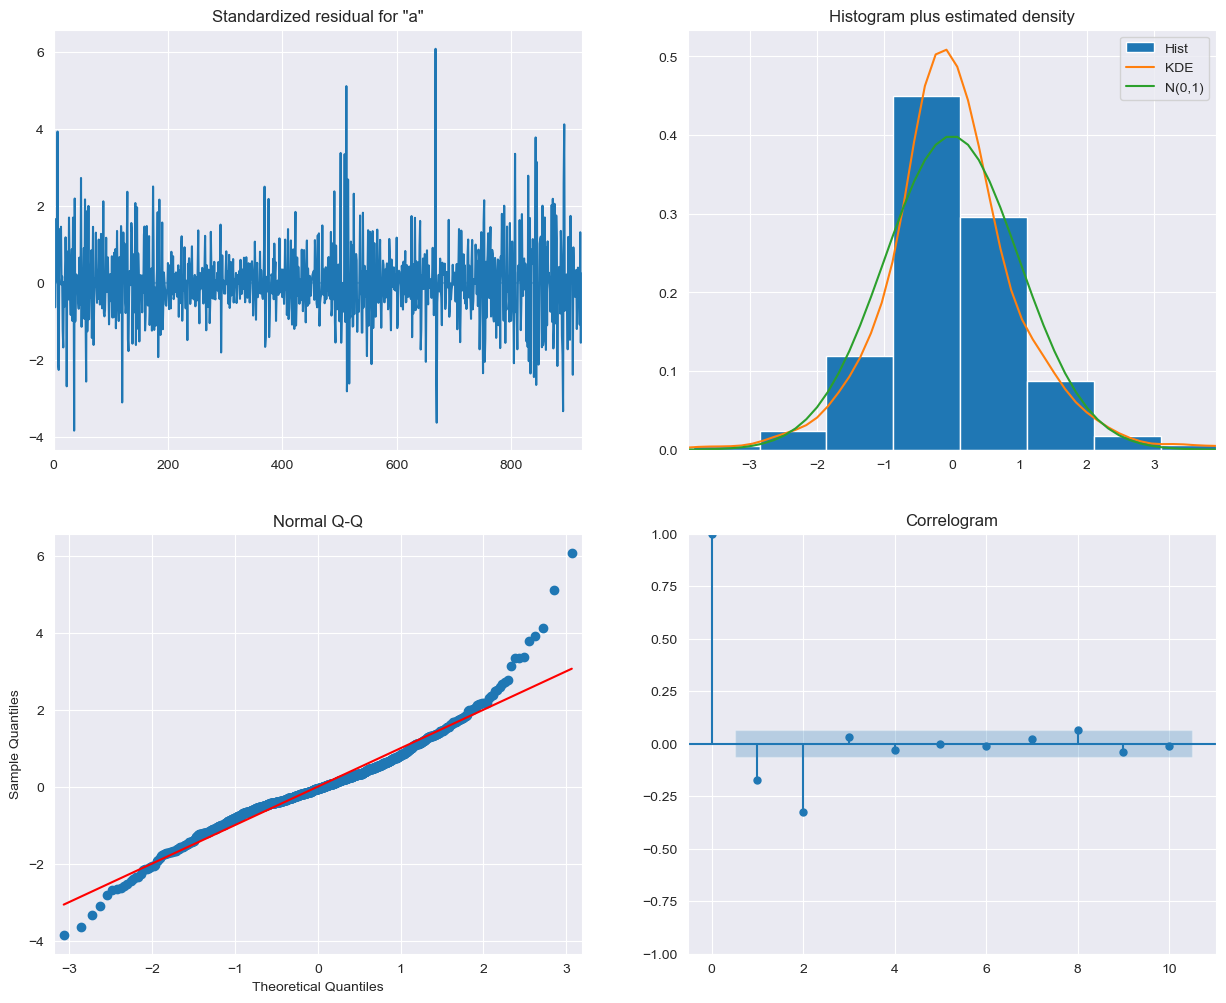

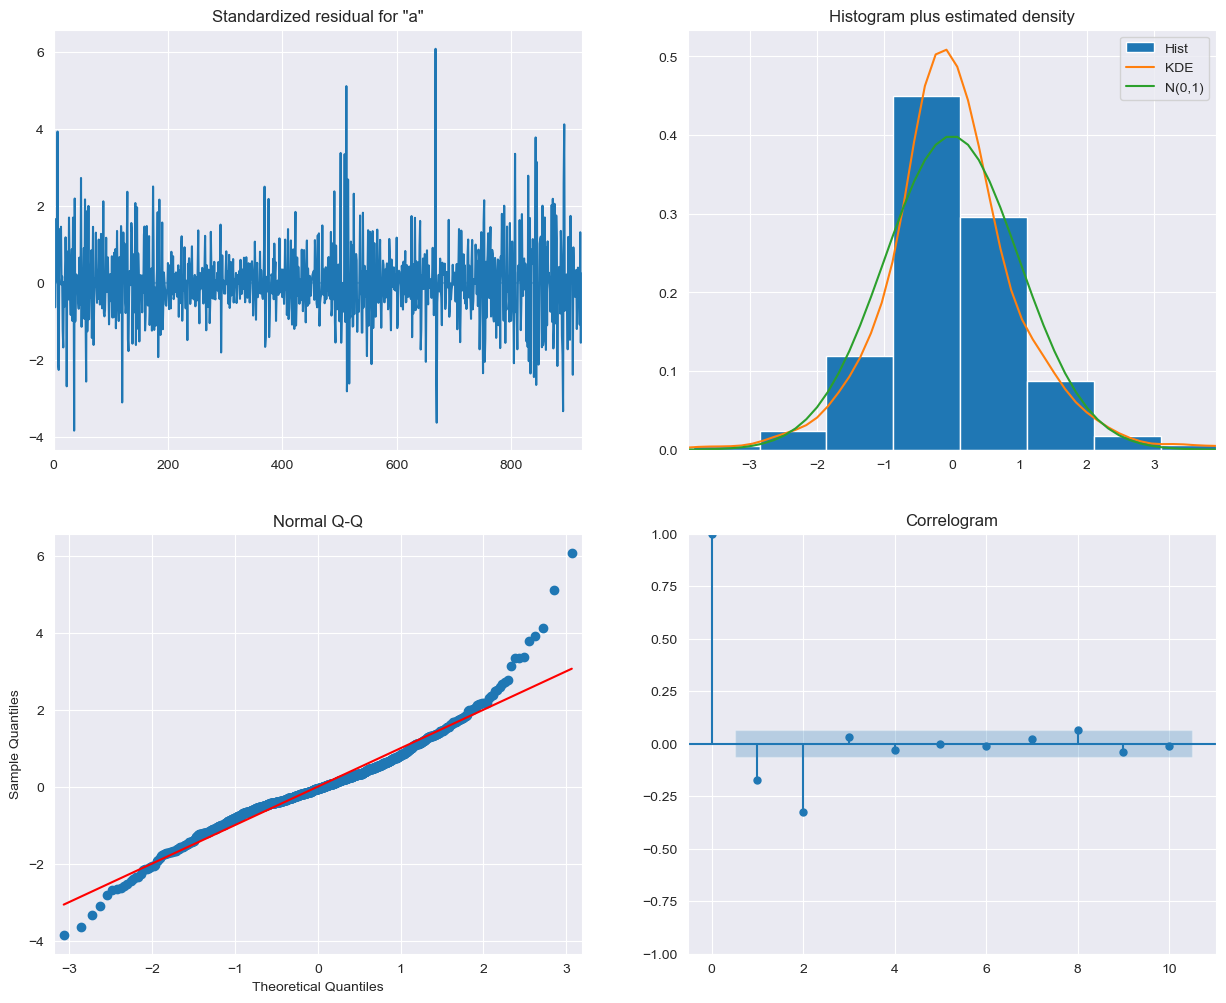

In [46]:
model_arima.plot_diagnostics(figsize=(15, 12))

Let's try iterating over different combinations of p, d and q

p = is the order (number of time lags) of the autoregressive part of the model.

d = is the degree of differencing (the number of times that past values have been subtracted from the data).

q = is the order of the moving average part of the model.

In [47]:
aicVals2 = []
for p in range(5):  # we are searching for 5 p values
    for d in range(5): # and for each p value we are trying to find q values
        for q in range(5): # and for each q values we are trying to find d values
            print(f'p: {p}, d: {d}, q: {q}')
            aicVals.append([sm.ARIMA(df_hotel['adr'], order=(p,d,q)).fit().aic, p, d, q])

p: 0, d: 0, q: 0
p: 0, d: 0, q: 1
p: 0, d: 0, q: 2
p: 0, d: 0, q: 3
p: 0, d: 0, q: 4
p: 0, d: 1, q: 0
p: 0, d: 1, q: 1
p: 0, d: 1, q: 2
p: 0, d: 1, q: 3
p: 0, d: 1, q: 4
p: 0, d: 2, q: 0
p: 0, d: 2, q: 1
p: 0, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 3, q: 0
p: 0, d: 3, q: 1
p: 0, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 3, q: 3
p: 0, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 0
p: 0, d: 4, q: 1
p: 0, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 0
p: 1, d: 0, q: 1
p: 1, d: 0, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 4
p: 1, d: 1, q: 0
p: 1, d: 1, q: 1
p: 1, d: 1, q: 2
p: 1, d: 1, q: 3
p: 1, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 1, d: 2, q: 0
p: 1, d: 2, q: 1
p: 1, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 0
p: 1, d: 3, q: 1
p: 1, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 0
p: 1, d: 4, q: 1


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 0, q: 0
p: 2, d: 0, q: 1


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 2, d: 0, q: 2
p: 2, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 0
p: 2, d: 1, q: 1
p: 2, d: 1, q: 2
p: 2, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 2, q: 0
p: 2, d: 2, q: 1
p: 2, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 3, q: 0
p: 2, d: 3, q: 1
p: 2, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 4, q: 0
p: 2, d: 4, q: 1
p: 2, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 0, q: 0
p: 3, d: 0, q: 1
p: 3, d: 0, q: 2
p: 3, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 0
p: 3, d: 1, q: 1
p: 3, d: 1, q: 2
p: 3, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 2, q: 0
p: 3, d: 2, q: 1
p: 3, d: 2, q: 2
p: 3, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 3, q: 0
p: 3, d: 3, q: 1
p: 3, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 4, q: 0
p: 3, d: 4, q: 1
p: 3, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 0, q: 0
p: 4, d: 0, q: 1
p: 4, d: 0, q: 2
p: 4, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 1, q: 0
p: 4, d: 1, q: 1
p: 4, d: 1, q: 2
p: 4, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 2, q: 0
p: 4, d: 2, q: 1
p: 4, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 0
p: 4, d: 3, q: 1
p: 4, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 0
p: 4, d: 4, q: 1
p: 4, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
aicVals2.sort()
aicVals

[[9471.156399826039, 1, 1],
 [9471.714661927508, 4, 4],
 [9472.378265133722, 4, 3],
 [9472.45701698872, 1, 2],
 [9472.496226414085, 2, 1],
 [9473.79326595811, 2, 2],
 [9473.899624150725, 1, 3],
 [9473.925170105656, 3, 1],
 [9474.354998991763, 2, 3],
 [9474.393009810483, 3, 2],
 [9475.316245494092, 3, 3],
 [9475.796748127035, 4, 1],
 [9475.810560440585, 1, 4],
 [9476.273020393603, 4, 2],
 [9476.514982534203, 2, 4],
 [9477.842485370991, 3, 4],
 [9545.82437444069, 4, 0],
 [9570.424901650118, 3, 0],
 [9644.95954485923, 2, 0],
 [9718.404903545614, 0, 4],
 [9754.450445409208, 0, 3],
 [9770.271842812632, 1, 0],
 [9832.040800325722, 0, 2],
 [9922.072232527631, 0, 1],
 [10123.92911128542, 0, 0],
 [10123.92911128542, 0, 0, 0],
 [9922.072232527631, 0, 0, 1],
 [9832.040800325722, 0, 0, 2],
 [9754.450445409208, 0, 0, 3],
 [9718.404903545614, 0, 0, 4],
 [9983.02139029374, 0, 1, 0],
 [9460.987491601009, 0, 1, 1],
 [9462.484459728688, 0, 1, 2],
 [9464.116721854993, 0, 1, 3],
 [9465.9249936558, 0, 1, 4

No warnings here, the algorithm might run succesfully p: 0, d: 1, q: 1

# Sarimax

In [49]:
# Reset Index for train set
df_train.reset_index(drop=False, inplace=True)

In [102]:
# We will set a season order of 3 months as there is no clear seasonal pattern 
model_sarimax = SARIMAX(df_train['adr'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 3)).fit()

In [103]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               adr   No. Observations:                  740
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 3)   Log Likelihood               -3706.049
Date:                           Tue, 14 Nov 2023   AIC                           7418.098
Time:                                   15:43:10   BIC                           7431.901
Sample:                                        0   HQIC                          7423.421
                                           - 740                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8472      0.020    -42.221      0.000      -0.887      -0.808
ma.S.L3       -0.9976      0.024    -41.076      0.000      -1.045      -0.950
sigma2      1350.9390     37.319     36.200      0.000    1277.795    1424.083
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2157.80
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.29
Prob(H) (two-sided):                  0.82   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The model summary shows a lot of information about the fitting process:**

Model Fit Statistics: This part includes several statistics that help you evaluate how well the model fits the data:

Log-Likelihood: A measure of how well the model explains the observed data. When fitting an ARIMA model, negative log-likelihood values will be encounter, with more negative values indicating a poorer fit to the data, and values closer to zero indicating a better fit.

AIC (Akaike Information Criterion): A goodness-of-fit metric that balances the fit of the model with its complexity. Lower AIC values are preferred.

BIC (Bayesian Information Criterion): Similar to AIC, but penalizes model complexity more. As with AIC, lower BIC values are better.

HQIC (Hannan-Quinn Information Criterion): Another model selection criterion, similar to AIC and BIC.

Coefficients: This table lists the estimated coefficients for the parameters of the model. It includes both autoregressive (AR) and moving average (MA) parameters, as well as any exogenous variables if they are included in the model. It also includes the standard errors associated with the estimated coefficients to indicate the uncertainty in the parameter estimates, their P-values, which are used to assess the significance of each coefficient, and the 95% confidence interval.

Model diagnostics: This section provides information about the residuals (the differences between the observed values (training values) and their predicted values from the model):

Ljung-Box test: A test for autocorrelation in the residuals.

Jarque-Bera test: A test of the normality of the residuals.

Skewness and kurtosis: Measures of the shape of the distribution of the residuals.


https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html

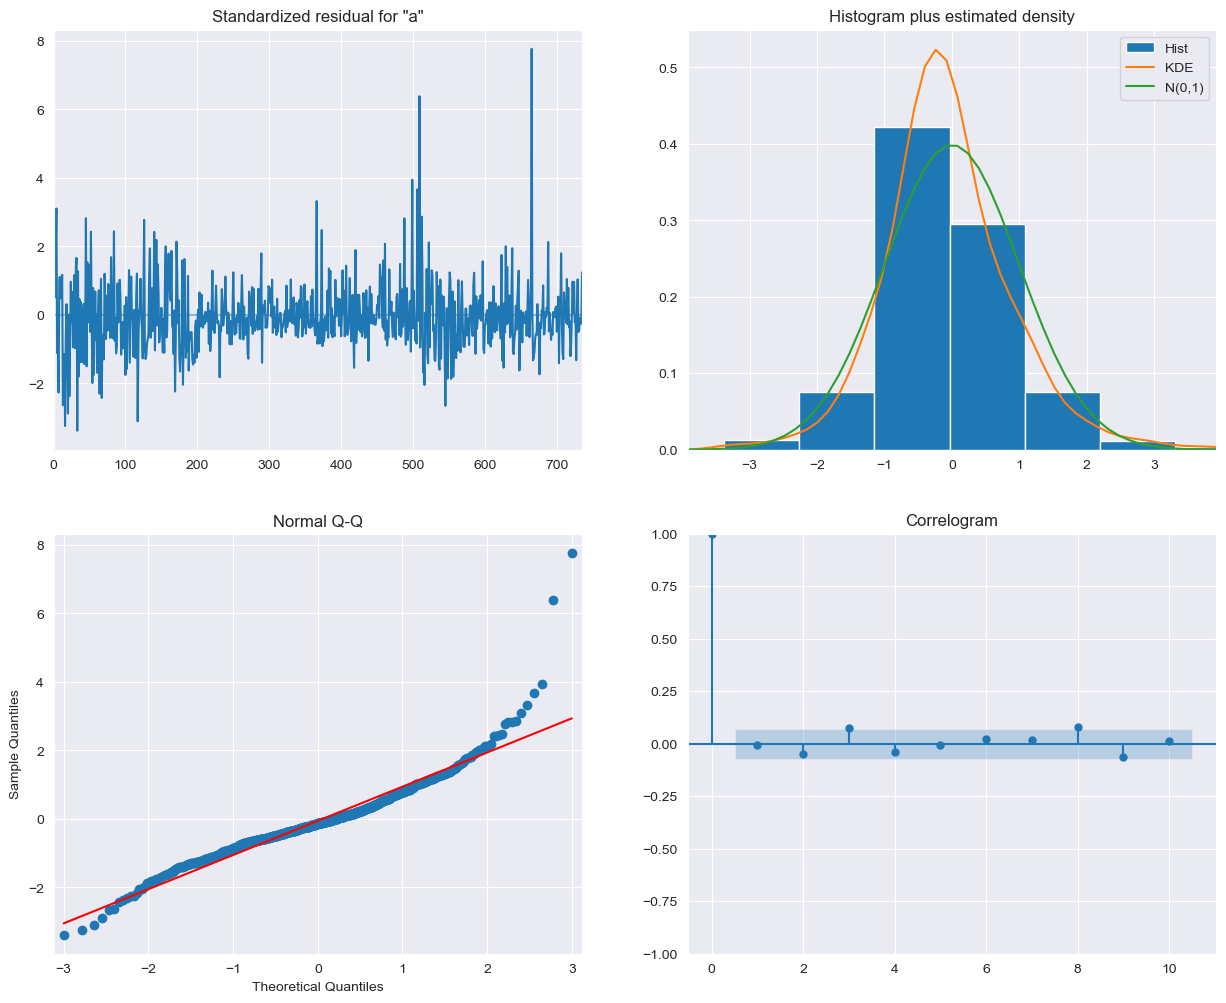

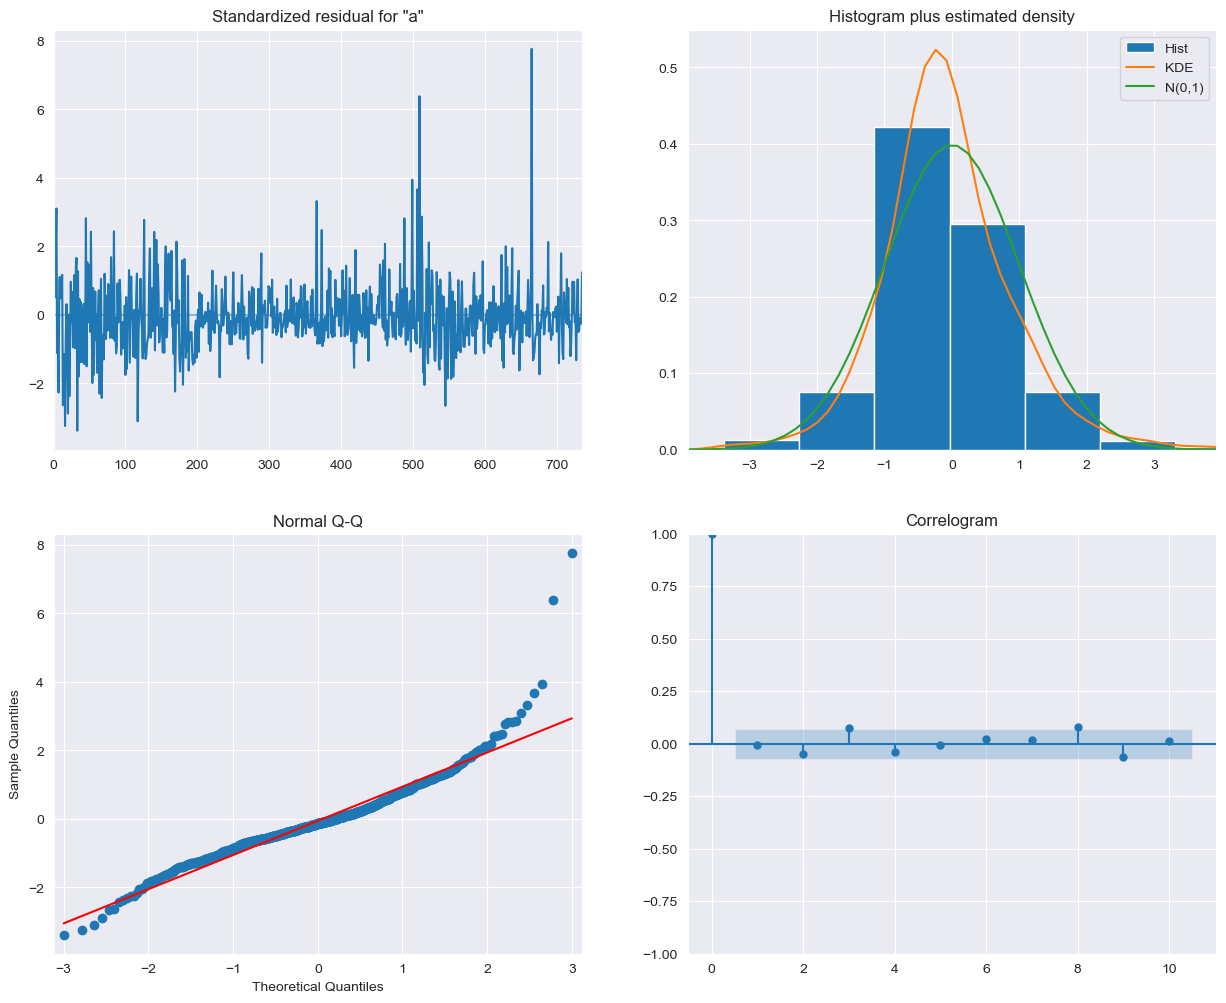

In [104]:
model_sarimax.plot_diagnostics(figsize=(15, 12))

## One-step-ahead forecasts of the last 10 observations

In [53]:
pred_time = 10

results = model_arima.forecast(pred_time)

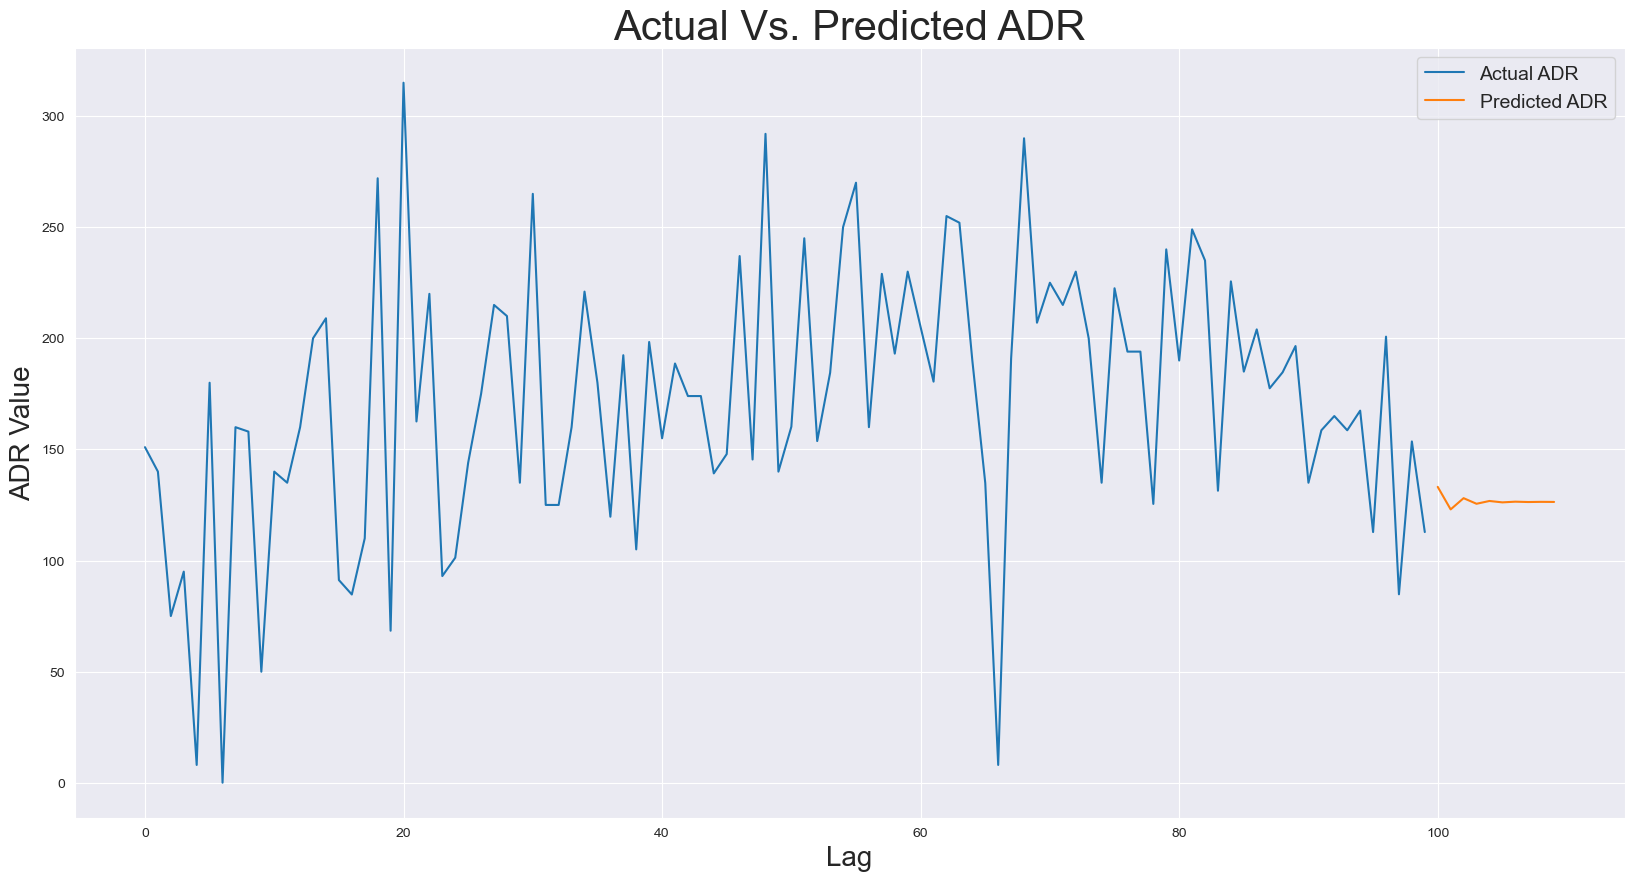

In [54]:
# Set the number of lags 100
lagsDisplayed = 100

plt.figure(figsize=(20, 10))

# Plot the actual ADR values
plt.plot(
    range(lagsDisplayed), 
    df_hotel['adr'][-lagsDisplayed:],
    label='Actual ADR'
)

# Plot the predicted ADR values.
plt.plot(
    range(lagsDisplayed, lagsDisplayed + pred_time), 
    results,
    label='Predicted ADR'
)

plt.title('Actual Vs. Predicted ADR', fontsize=30)
plt.xlabel('Lag', fontsize=20)
plt.ylabel('ADR Value', fontsize=20)

plt.legend(fontsize=14)

plt.show()

**It is clear from the plot that, after 100 lags, there is very minimal effect on response.**

## Forecast Errors

In [93]:
forecast_values = model_arima.get_forecast(steps=(df_hotel.shape[0]-split))
forecast_ci = forecast_values.conf_int() 

In [94]:
results

926   133.13
927   122.99
928   128.05
929   125.53
930   126.78
931   126.16
932   126.47
933   126.31
934   126.39
935   126.35
Name: predicted_mean, dtype: float64

### r2_score

How much of the variance is captured by the model

In [95]:
predicted_values = forecast_values.predicted_mean[-len(df_hotel['adr']):]

actual_values = df_hotel['adr'][:len(predicted_values)]

r2 = r2_score(actual_values, predicted_values)

print('R2 Score:',r2)

R2 Score: -0.036225627132999705


### mean_squared_error

In [96]:
predicted_values = forecast_values.predicted_mean[-len(df_hotel['adr']):]

actual_values = df_hotel['adr'][:len(predicted_values)]

mae = mean_absolute_error(actual_values, predicted_values)

print('Mean Absolute Absolute Error (MAE):',mae)

Mean Absolute Absolute Error (MAE): 38.29588165467534


The model did not a good job of capturing all the data 

In [99]:
model_arima.predict(start=df_hotel["adr"].shape[0]+10, end=df_hotel["adr"].shape[0]+20) 

936   126.37
937   126.36
938   126.37
939   126.37
940   126.37
941   126.37
942   126.37
943   126.37
944   126.37
945   126.37
946   126.37
Name: predicted_mean, dtype: float64

# Text Analytics
# Real-world dataset: Political Social Media

In [3]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 2127: invalid start byte

df_ts = pd.read_csv('political_social_media.csv', encoding='iso-8859-1')

In [4]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [5]:
df_ts.shape

(5000, 21)

In [6]:
df_ts.describe()

,_unit_id,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
count,5000.00,5000.00,5000.00,5000.00,5000.00,0.00,0.00,0.00,0.00
mean,766194985.16,1.03,1.00,0.99,1.00,NaN,NaN,NaN,NaN
std,1444.06,0.18,0.05,0.05,0.04,NaN,NaN,NaN,NaN
min,766192484.00,1.00,0.51,0.50,0.50,NaN,NaN,NaN,NaN
25%,766193734.75,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
50%,766194985.50,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
75%,766196235.25,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
max,766197486.00,3.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN


In [7]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 5000 non-null   object 
 8   bias:confidence      5000 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

In [8]:
df_ts.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'audience',
 'audience:confidence',
 'bias',
 'bias:confidence',
 'message',
 'message:confidence',
 'orig__golden',
 'audience_gold',
 'bias_gold',
 'bioid',
 'embed',
 'id',
 'label',
 'message_gold',
 'source',
 'text']

In [9]:
# The missing values will not affect the analysis
df_ts.isna().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                      0
bias:confidence           0
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

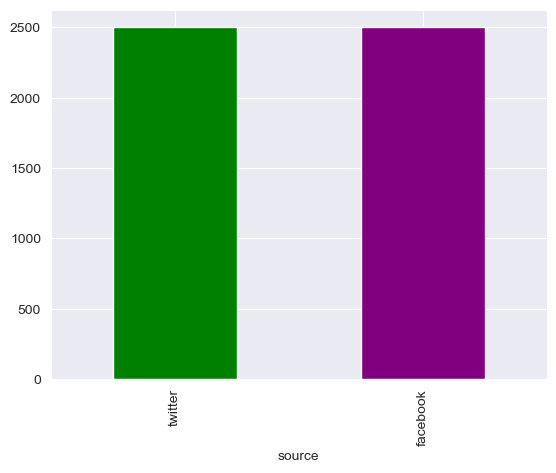

In [10]:
# Source is equally distributed
colors= ['green','purple']
df_ts['source'].value_counts().plot(kind='bar',color=colors);

In [11]:
# We will convert the Date & Time to 'datetime64'
df_ts['_last_judgment_at'].describe()

count            5000
unique            238
top       8/5/15 6:05
freq               60
Name: _last_judgment_at, dtype: object

In [12]:
# Rename '_last_judgment_at' to judgment_timestamp for redability

df_ts = df_ts.rename(columns={'_last_judgment_at': 'judgment_timestamp'})
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,judgment_timestamp,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [13]:
# Converting Dtype from 'object' to 'datetime64' to ensure accurate predictions on time series

df_ts['judgment_timestamp'] = pd.to_datetime(df_ts['judgment_timestamp'])
df_ts['judgment_timestamp'].head()

C:\Users\ariel\AppData\Local\Temp\ipykernel_3052\2587820411.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ts['judgment_timestamp'] = pd.to_datetime(df_ts['judgment_timestamp'])


0   2015-08-04 21:17:00
1   2015-08-04 21:20:00
2   2015-08-04 21:14:00
3   2015-08-04 21:08:00
4   2015-08-04 21:26:00
Name: judgment_timestamp, dtype: datetime64[ns]

In [14]:
# Set index Date and Time
df_ts.set_index('judgment_timestamp', inplace=True)

In [15]:
df_ts.index

DatetimeIndex(['2015-08-04 21:17:00', '2015-08-04 21:20:00',
               '2015-08-04 21:14:00', '2015-08-04 21:08:00',
               '2015-08-04 21:26:00', '2015-08-04 21:06:00',
               '2015-08-04 21:07:00', '2015-08-04 20:51:00',
               '2015-08-04 20:57:00', '2015-08-04 21:14:00',
               ...
               '2015-08-05 05:12:00', '2015-08-05 04:59:00',
               '2015-08-05 05:36:00', '2015-08-05 05:45:00',
               '2015-08-05 05:39:00', '2015-08-05 06:05:00',
               '2015-08-05 05:57:00', '2015-08-05 05:10:00',
               '2015-08-05 06:08:00', '2015-08-05 05:04:00'],
              dtype='datetime64[ns]', name='judgment_timestamp', length=5000, freq=None)

In [16]:
df_ts.index.shape

(5000,)

In [17]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 21:17:00,766192484,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
2015-08-04 21:20:00,766192485,False,finalized,1,national,1.00,partisan,1.00,attack,1.00,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2015-08-04 21:14:00,766192486,False,finalized,1,national,1.00,neutral,1.00,support,1.00,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
2015-08-04 21:08:00,766192487,False,finalized,1,national,1.00,neutral,1.00,policy,1.00,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
2015-08-04 21:26:00,766192488,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


### Resampling: 5-minutes interval

In [18]:
dfr = df_ts.resample('5T')

In [19]:
dfr

In [20]:
dfr = dfr.count()
dfr.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 20:00:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-04 20:05:00,24,24,24,24,24,24,24,24,24,24,0,0,0,24,24,24,24,0,24,24
2015-08-04 20:10:00,40,40,40,40,40,40,40,40,40,40,0,0,0,40,40,40,40,0,40,40
2015-08-04 20:15:00,52,52,52,52,52,52,52,52,52,52,0,0,0,52,52,52,52,0,52,52
2015-08-04 20:20:00,68,68,68,68,68,68,68,68,68,68,0,0,0,68,68,68,68,0,68,68


In [21]:
dfr.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-05 14:35:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-05 14:40:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4
2015-08-05 14:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:55:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4


### Plotting the data resampled at 5-minute interval frequency

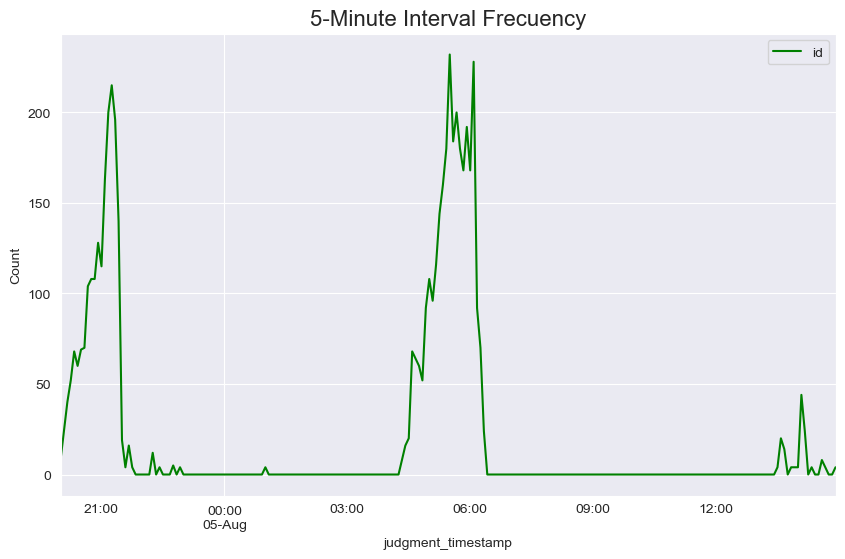

In [22]:
df_ts.resample('5T').count().plot(y='id', figsize=(10,6), color='g')
plt.title('5-Minute Interval Frecuency', fontsize=16)
plt.ylabel('Count')
plt.show();

#  LDA (Latent Dirichlet Allocation)

In [23]:
# Reset Index
df_ts.reset_index(drop=True, inplace=True)

In [25]:
# Getting our texts in a list to process
text = df_ts['text'].values.tolist()
text

['RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH',
 'VIDEO - #Obamacare:  Full of Higher Costs and Broken Promises: http://t.co/dn3vzqIrWF',
 'Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices.',
 'RT @SenatorLeahy: 1st step toward Senate debate on Leahy-Crapo #VAWA bill is the Senate\x89Ûªs procedural vote today at 5:30 pm',
 '.@amazon delivery #drones show need to update law to promote #innovation &amp; protect #privacy. My #UAS bill does that: http://t.co/l9ta5SKq6u',
 'Called on the @USDOTFRA to release info about inspections before the #CasseltonDerailment to review quality of rails. (1/2)',
 "@BBCWorld, help us keep the kidnapped Nigerian school girls' story out front. #BringBackOurGirls #JoinRepWilson http://t.co/ZqZVT80mga",
 'Show your Arizona pride-choose your favorite S. AZ picture for my Facebook cover photo! Retweet to spread the word! https:

In [26]:
df_text = pd.DataFrame({'text': text})

df_text.head()

,text
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,VIDEO - #Obamacare: Full of Higher Costs and ...
2,Please join me today in remembering our fallen...
3,RT @SenatorLeahy: 1st step toward Senate debat...
4,.@amazon delivery #drones show need to update ...


# Word Cloud

In [27]:
long_string = ','.join(text)
len(long_string)

1031542

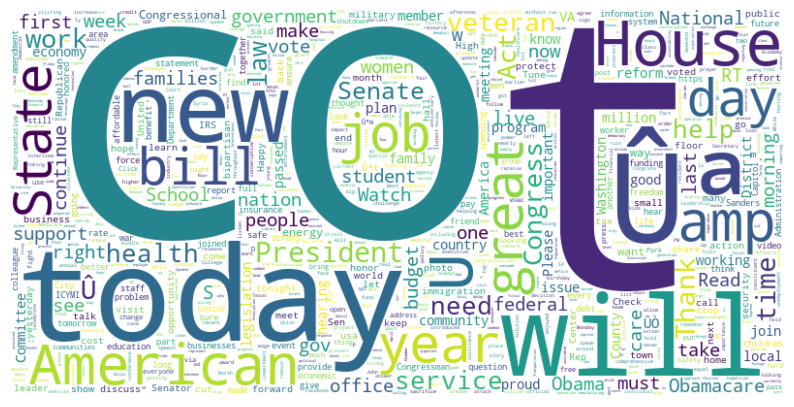

In [28]:
wordcloud = WordCloud(
    background_color='white',
    max_words=5000,
    collocations=False,
    width=800,  
    height=400)

wordcloud.generate(long_string)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [29]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [30]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [31]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [32]:
# Getting our texts in a list to process
text = df_ts['text'].values.tolist()
text

['RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH',
 'VIDEO - #Obamacare:  Full of Higher Costs and Broken Promises: http://t.co/dn3vzqIrWF',
 'Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices.',
 'RT @SenatorLeahy: 1st step toward Senate debate on Leahy-Crapo #VAWA bill is the Senate\x89Ûªs procedural vote today at 5:30 pm',
 '.@amazon delivery #drones show need to update law to promote #innovation &amp; protect #privacy. My #UAS bill does that: http://t.co/l9ta5SKq6u',
 'Called on the @USDOTFRA to release info about inspections before the #CasseltonDerailment to review quality of rails. (1/2)',
 "@BBCWorld, help us keep the kidnapped Nigerian school girls' story out front. #BringBackOurGirls #JoinRepWilson http://t.co/ZqZVT80mga",
 'Show your Arizona pride-choose your favorite S. AZ picture for my Facebook cover photo! Retweet to spread the word! https:

In [33]:
# Lsit of words
words = list(sent_to_words(text))

In [34]:
words = remove_stopwords(words) 

In [35]:
len(words)

5000

In [36]:
words[0]

['rt',
 'nowthisnews',
 'rep',
 'trey',
 'radel',
 'fl',
 'slams',
 'obamacare',
 'politics',
 'https',
 'co',
 'zvywmg',
 'yih']

In [37]:
# Make a dictionary of ids for the words
id2word = corpora.Dictionary(words)

In [38]:
id2word

In [39]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [40]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(0, 1),
  (4, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(8, 1),
  (33, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1)],
 [(0, 1),
  (18, 1),
  (35, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(0, 1),
  (18, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),


In [41]:
# Based on 'expert knowledge'
num_topics = 20

In [42]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [43]:
pprint(lda_model.print_topics())

[(0,
  '0.017*"http" + 0.012*"co" + 0.009*"today" + 0.006*"house" + 0.005*"new" + '
  '0.005*"help" + 0.004*"uªs" + 0.004*"great" + 0.003*"day" + '
  '0.003*"government"'),
 (1,
  '0.015*"http" + 0.012*"co" + 0.007*"today" + 0.006*"amp" + 0.006*"house" + '
  '0.005*"senate" + 0.005*"obamacare" + 0.005*"jobs" + 0.005*"uªs" + '
  '0.003*"law"'),
 (2,
  '0.018*"http" + 0.013*"co" + 0.009*"today" + 0.005*"amp" + 0.005*"congress" '
  '+ 0.004*"great" + 0.004*"th" + 0.004*"uªs" + 0.004*"state" + 0.004*"house"'),
 (3,
  '0.022*"http" + 0.018*"co" + 0.009*"uªs" + 0.009*"today" + 0.006*"president" '
  '+ 0.004*"house" + 0.004*"help" + 0.004*"need" + 0.004*"law" + '
  '0.004*"state"'),
 (4,
  '0.009*"http" + 0.006*"co" + 0.006*"gov" + 0.005*"great" + 0.005*"health" + '
  '0.004*"care" + 0.004*"house" + 0.004*"make" + 0.004*"us" + 0.004*"jobs"'),
 (5,
  '0.028*"http" + 0.026*"co" + 0.007*"uªs" + 0.007*"today" + 0.006*"president" '
  '+ 0.005*"house" + 0.004*"morning" + 0.004*"one" + 0.003*"work" 

In [45]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [46]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [47]:
LDAvis_prepared

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
5     -0.04  0.01       1        1  7.32
9      0.01  0.02       2        1  7.03
15    -0.01 -0.00       3        1  6.41
19    -0.01  0.01       4        1  6.34
3     -0.02  0.00       5        1  6.13
0     -0.01  0.02       6        1  6.12
6     -0.01 -0.05       7        1  5.61
11     0.03  0.02       8        1  5.43
10    -0.05 -0.04       9        1  5.41
14     0.00  0.02      10        1  5.36
13    -0.03  0.02      11        1  4.70
2     -0.02  0.07      12        1  4.46
1     -0.01 -0.03      13        1  4.16
8     -0.05 -0.04      14        1  4.13
18    -0.01 -0.01      15        1  4.10
17    -0.00  0.04      16        1  4.10
4      0.09 -0.05      17        1  3.68
12     0.02 -0.02      18        1  3.55
7      0.06  0.06      19        1  3.23
16     0.07 -0.02      20        1  2.74, topic_info=            Term    Freq   Total Category  logprob  loglift
0             co 1492.00 1492.00  Default    30.00    30.00
18          http 1846.00 1846.00  Default    29.00    29.00
1084    veterans  252.00  252.00  Default    28.00    28.00
118        great  340.00  340.00  Default    27.00    27.00
81        school  125.00  125.00  Default    26.00    26.00
...          ...     ...     ...      ...      ...      ...
10391        www    6.27  200.79  Topic20    -6.10     0.13
335    americans    6.10  194.78  Topic20    -6.13     0.14
118        great    6.78  340.82  Topic20    -6.03    -0.32
75          help    5.44  223.34  Topic20    -6.25    -0.12
50           amp    5.33  366.56  Topic20    -6.27    -0.63

[1704 rows x 6 columns], token_table=       Topic  Freq      Term
term                        
9288       8  0.74     aapis
6338       2  0.52      aarp
3469       2  0.70  aberdeen
1017       4  0.09       abt
1017       5  0.09       abt
...      ...   ...       ...
8728      15  0.30        ys
11168      8  0.55     yunus
9499      10  0.75        zb
6170       8  0.56      zuma
8904      15  0.61       zxu

[6007 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 16, 20, 4, 1, 7, 12, 11, 15, 14, 3, 2, 9, 19, 18, 5, 13, 8, 17])

## Removing more unwanted words/characters

In [68]:
# Adding more stop words based on 'expert knowledge' and some data exploration
stop_words.extend(['http', 'co', 'uªs', 'amp', 'th', 'www','rt','tco','uo', 'uªt','va','irs','u_','dc','la'])

In [69]:
# Remove punctuation
df_text['processsed_text'] = df_text['text'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Convert the titles to lowercase
df_text['processsed_text'] = df_text['processsed_text'].map(lambda x: x.lower())

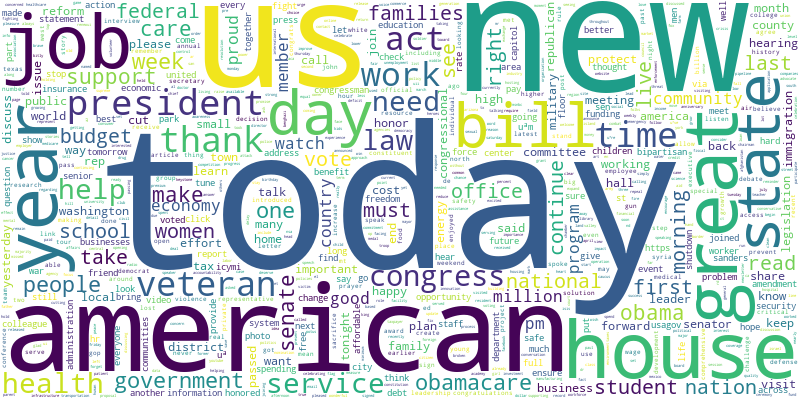

In [70]:
texts = df_text['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

# Processing for the word cloud (remember it needs one long string)
long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue',
                      collocations=False,
                      width=800,
                      height=400)

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [71]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
6     -0.04  0.00       1        1  8.33
5     -0.05 -0.00       2        1  7.05
3     -0.04 -0.02       3        1  6.97
14     0.00 -0.02       4        1  6.61
8     -0.02  0.02       5        1  6.05
19     0.04 -0.02       6        1  5.27
18    -0.00  0.01       7        1  5.21
16    -0.00 -0.01       8        1  5.16
0     -0.03 -0.02       9        1  5.15
12    -0.03  0.02      10        1  5.13
17     0.01 -0.01      11        1  4.69
4     -0.01  0.01      12        1  4.60
11    -0.02  0.01      13        1  4.39
1     -0.01 -0.02      14        1  4.21
2      0.00 -0.05      15        1  4.01
9      0.09  0.08      16        1  3.76
10     0.02 -0.00      17        1  3.63
13     0.00 -0.03      18        1  3.50
15     0.10 -0.05      19        1  3.29
7     -0.01  0.10      20        1  3.01, topic_info=            Term   Freq  Total Category  logprob  loglift
113        great 333.00 333.00  Default    30.00    30.00
1072    veterans 240.00 240.00  Default    29.00    29.00
30         today 701.00 701.00  Default    28.00    28.00
456       thanks 160.00 160.00  Default    27.00    27.00
304       energy 107.00 107.00  Default    26.00    26.00
...          ...    ...    ...      ...      ...      ...
209   government   6.56 213.94  Topic20    -6.08     0.02
212         week   6.08 190.12  Topic20    -6.16     0.06
3      obamacare   5.52 214.26  Topic20    -6.25    -0.15
374          job   5.33 119.00  Topic20    -6.29     0.40
314          new   5.37 310.23  Topic20    -6.28    -0.55

[1709 rows x 6 columns], token_table=       Topic  Freq      Term
term                        
9304       4  0.76     aapis
6341      11  0.60      aarp
3459       4  0.76  aberdeen
9953      20  0.32    abuses
722        1  0.08       aca
...      ...   ...       ...
13395      3  0.56  yubacity
9516       9  0.77        zb
8294      17  0.62      zmnv
17109      6  0.41      zoni
5454      15  0.62        zu

[6305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 4, 15, 9, 20, 19, 17, 1, 13, 18, 5, 12, 2, 3, 10, 11, 14, 16, 8])

In [58]:
len(words)

5000

In [59]:
words[0]

['nowthisnews',
 'rep',
 'trey',
 'radel',
 'fl',
 'slams',
 'obamacare',
 'politics',
 'https',
 'zvywmg',
 'yih']

In [60]:
# Adding our predicted topic (based on highest affinity score) and the corresponding score to the dataframe
predicted_topics = []
predicted_scores = []

for word in words:
    # Gets the predicted topics for a given document
    pred_topics = lda_model.get_document_topics(id2word.doc2bow(word), minimum_probability=None)
    # Sort the predicted topics by max score
    pred_topics.sort(reverse=True, key=lambda x: x[1])
    # Add the topic and socre to their respective lists
    predicted_topics.append(pred_topics[0][0])
    predicted_scores.append(pred_topics[0][1])
df_text['predicted_topic'] = predicted_topics
df_text['predicted_score'] = predicted_scores

In [61]:
df_text.head().sort_values(by='predicted_score',ascending=False)

,text,processsed_text,predicted_topic,predicted_score
3,RT @SenatorLeahy: 1st step toward Senate debat...,rt @senatorleahy: 1st step toward senate debat...,3,0.94
2,Please join me today in remembering our fallen...,please join me today in remembering our fallen...,8,0.93
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt @nowthisnews: rep trey radel (r- #fl) slams...,2,0.92
4,.@amazon delivery #drones show need to update ...,@amazon delivery #drones show need to update l...,9,0.66
1,VIDEO - #Obamacare: Full of Higher Costs and ...,video - #obamacare: full of higher costs and ...,0,0.62
